In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
from bokeh.io import output_file, show
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
stemmer=PorterStemmer()
df = pd.read_csv(r"C:\Users\karun\Downloads\Data Set and Images used\Data Set and Images used\Personality.csv")

In [4]:
print(df.head(10))

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


In [6]:
#Data Processing

In [7]:
def cleanText(text):
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', '', text)
    text = text.replace("|||"," ")
    text=text.lower()
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)

    return text

In [8]:
df['posts'] = df['posts'].apply(cleanText)
df.head()

,type,posts
0,INFJ,' enfp and intj moments sportscenter not t...
1,ENTP,'i'm finding the lack of me in these posts ver...
2,INTP,"'good one _____ of course, to which i say ..."
3,INTJ,"'dear intp, i enjoyed our conversation the o..."
4,ENTJ,'you're fired. that's another silly misconcept...


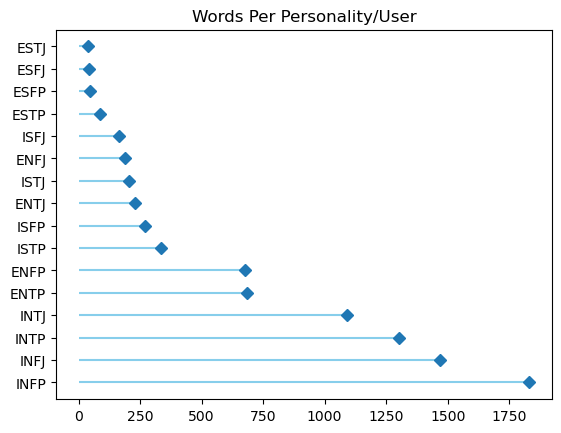

In [9]:
dist = df['type'].value_counts()
plt.hlines(y=list(range(16)), xmin=0, xmax=dist, color='skyblue')
plt.plot(dist, list(range(16)), "D")
plt.title("Words Per Personality/User")
plt.yticks(list(range(16)), dist.index)
plt.show()


In [10]:
#Dividing the 16 personalities into 4 major groups for ease
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)


In [11]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

In [12]:
#Building ML on 'type' column 
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values


In [13]:
print(y.shape)
print(X.shape)

(8675,)
(8675, 6)


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=5)

In [15]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Training Data Set",round(acc_random_forest,2,), "%")

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print("Testing Data Set", round(acc_random_forest,2,), "%")
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")


Training Data Set 91.95 %
Testing Data Set 17.6 %
23.39 %


In [16]:
type(y_train[0])

str

In [17]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")


47.46 %


In [18]:
#Ml on judging/perceiving column
X5 = df.drop(['type','posts','J-P'], axis=1).values
y5 = df['J-P'].values

print("outcome shape",y5.shape)
print("input shape for machine learning data",X5.shape)

outcome shape (8675,)
input shape for machine learning data (8675, 9)


In [19]:
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size = 0.1, random_state=5)

random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(X5_train, y5_train)

Y_prediction = random_forestt.predict(X5_test)

random_forestt.score(X5_train, y5_train)
acc_random_forestt = round(random_forestt.score(X5_train, y5_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")

Random Forest Predictions Model 98.28 %


In [20]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(X5_train, y5_train)

Y_predd = logregg.predict(X5_test)

acc_logg = round(logregg.score(X5_train, y5_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

Logisitic Regression Prediction Accuracy 60.39 %


In [21]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(X5_train, y5_train)

Y_predd = knnn.predict(X5_test)

acc_knnn = round(knnn.score(X5_train, y5_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

Knn neighbor prediction value 77.01 %
